<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jesús Sebastián González Ortiz y Mateo Vera Dorantes.

**Fecha:** 10 de octubre del 2021.

**Expediente** : 721621 y 709396.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/SebasGlez2000/Tarea6_JSGonzalez_MVDorantes

# Tarea 6: Clase 10

In [1]:
from scipy import optimize
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import math
import scipy.special as sps 
from math import factorial as fac

## Enunciado de tarea (Transcibirlo)
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:


### Ejercicio 1: (enunciado) Transcribirlo

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2

In [68]:
# Código de solución estudiante 2
f = lambda x:30*(x**2-2*x**3+x**4) #funcion

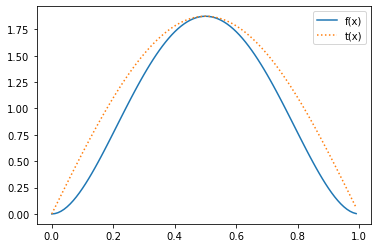

In [69]:
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #sacamos maximo y t
t = lambda x: maxf*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),":",label='t(x)')
plt.legend(loc="best")
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Integramos tx de 0 a 1

$ t(x) = a \cdot \sin(\pi x) $

$ c= \int_{0}^{1} a \cdot \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$

Nuestro resultado es:

$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} =  \frac{\pi \sin(\pi x)}{2}$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

$G(x) = \int g(x)dx $
 
$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$

$ u = \frac{1}{2}(- \cos(\pi x)+1) $

$ 2u = (- \cos(\pi x)+1) $

$ 2u-1 = - \cos(\pi x) $

$ \cos^{-1}(-2u+1) = \pi x$

$x= \frac{\cos^{-1}(-2u+1)}{\pi}$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [80]:
def ej(fx,inversa,N): #Definimos la función
    u = np.random.uniform(0,1,N)
    x = np.arange(0,1,.01)
    funcion = inversa(u)
    fx = fx(x)
    plt.plot(x,fx,'r--')
    plt.hist(funcion, bins=40, density=True)
    plt.show()

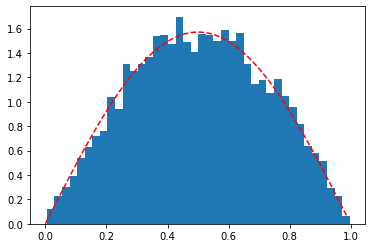

In [81]:
N=10000
g_x = lambda x: (np.pi*np.sin(np.pi*x))/2
equis = lambda u: (np.arccos(-2*u+1))/np.pi
ej(g_x,equis,N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

In [82]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

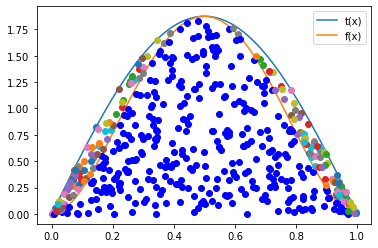

In [83]:
N = 500 
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,t(x),label='t(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()
graf = Acep_rechazo(R2,R1,f,t)

plt.show(graf)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [86]:
def Acep_rechazo_Sen(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [88]:
r_sen=(Acep_rechazo_Sen(R2,R1,f,t)/len(R1))*100
print('El porcentaje de aceptacion senoidal es del',r_sen,'%')

El porcentaje de aceptacion senoidal es del 65.8 %


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [102]:
f = lambda x:20*x*(1-x)**3 #funcion

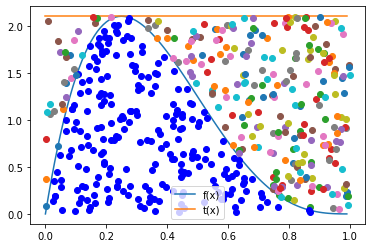

In [124]:
N = 500
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

Acep_rechazo(R2,R1,f,t)